<a href="https://colab.research.google.com/github/aksamps/lp4ml/blob/main/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LangChain Basics – From LLM Calls to RAG

### 🎯 Why This Notebook?

Before we jump into the deeper waters of **RAG pipelines** and **Agents**, this notebook will help you warm up with the essential building blocks of LangChain.

You’ll go from:
<br>
🔹 Making a basic **LLM call**
<br>
🔹 Using a **prompt template**
<br>
🔹 Creating **chains** by combining components
<br>
🔹 And finally, building a working **RAG pipeline** : where the LLM answers questions from real documents (not its training data)

This is your playground to build **intuition** before we dive deeper in the live session.

---

### 🧠 Core Concepts at a Glance

#### 🔹 LLM Call
A direct call to an LLM like GPT-4. You give it a prompt, and it gives you an answer. It’s like talking to ChatGPT behind the scenes.

<br>

#### 🔹 Prompt Template
A reusable way to structure inputs. You can insert variables like `{input}` or `{context}` dynamically — great for consistency and modularity.

<br>

#### 🔹 Chain
LangChain allows you to connect components together. For example, a **Prompt** → **LLM** → **Output Parser** can be combined into a single "chain" that flows from input to output.

<br>

#### 🔹 RAG (Retrieval-Augmented Generation)
Instead of relying only on the LLM’s memory, RAG lets us bring in **external knowledge**.

It works like this:
- A **retriever** pulls relevant document chunks from a vector database
- These are inserted into a prompt template as **context**
- The **LLM** is then asked to answer based only on that context

This is powerful for use cases like:
- Chatbots over documentation
- Q&A on company wikis or PDFs
- Smart search assistants

---

### Installing Packages

In [ ]:
#!pip install -q --upgrade pip

# Install core LangChain library and integrations with Chroma and OpenAI
#!pip3 install langchain langchain-chroma langchain-openai
#!pip uninstall -y langchain-core langchain-text-splitters

#!pip3 install langchain langchain-core==0.3.80 langchain-text-splitters==0.3.11 langchain-community==0.3.6 langchain-openai==0.2.2 langchain-chroma==0.1.3 requests==2.32.4 --force-reinstall
!pip3 install \
  langchain-text-splitters \
  langchain-openai>=0.2.3 \
  langchain-experimental>=0.3.4 \
  langchain-chroma \
  requests==2.32.4 \
  langchain-community>=0.3.29 \
  langchain-huggingface>=0.3.1

  # langchain-core==0.3.80 \

#!pip3 install langchain langchain-chroma langchain-openai

#!pip3 install requests==2.32.4

# Install BeautifulSoup for web scraping and HTML parsing
!pip install beautifulsoup4

# Install additional community-supported integrations for LangChain
#!pip3 install langchain-community

# Install FAISS (CPU version) for efficient vector similarity search
!pip install faiss-cpu

#!pip install langchain>0.4.0 langchain-core>1.0.0 langchain-openai<0.4.0 langchain-text-splitters<1.0.0 --force-reinstall

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.17.0 requires opentelemetry-api<=1.37.0,>=1.37.0, but you have opentelemetry-api 1.38.0 which is incompatible.
google-adk 1.17.0 requires opentelemetry-sdk<=1.37.0,>=1.37.0, but you have opentelemetry-sdk 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-exporter-otlp-proto-common==1.37.0, but you have opentelemetry-exporter-otlp-proto-common 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-proto==1.37.0, but you have opentelemetry-proto 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-sdk~=1.37.0, but you have opentelemetry-sdk 1.38.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 74.1 MB/s eta 0:00:00


### Setting Up API Access

In [ ]:
# Import necessary modules for environment setup and secure input
import getpass
import os

# Enable LangChain's tracing to monitor and debug chain executions
os.environ["LANGCHAIN_TRACING_V2"] = "true"

# Securely prompt the user to enter their OpenAI API key (input hidden)
os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### Code Explanation:

`getpass.getpass()` safely asks for your OpenAI API key without showing it on the screen.

`LANGCHAIN_TRACING_V2 = "true"` turns on a useful tracking tool that helps you see what your LangChain app is doing step-by-step. Super helpful for debugging or understanding how the pieces work together.
Think of it like switching on a "behind-the-scenes" camera for your LLM workflows.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Simple LLM Call

In [ ]:
# Import the ChatOpenAI LLM wrapper from LangChain's OpenAI integration
from langchain_openai import ChatOpenAI

# Initialize the OpenAI Chat model using the API key from environment variables
#llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])

llm = ChatOpenAI(model="x-ai/grok-4.1-fast:free",
                 openai_api_base="https://openrouter.ai/api/v1",
                 openai_api_key=os.environ["OPENAI_API_KEY"],
                 temperature=0.3)

### Explanation:

`ChatOpenAI` is LangChain’s wrapper around OpenAI’s chat models (like GPT-3.5 or GPT-4).

We’re creating an LLM instance (llm) that’s ready to receive prompts and return responses.

The api_key is securely pulled from your environment (as set earlier), so you don’t have to hardcode secrets.

In [ ]:
# Invoke the LLM with a prompt and store the response in the 'answer' variable
# This sends the question to the model and retrieves its answer
answer = llm.invoke("how can langsmith help with testing?")

* You’re sending a prompt directly to the LLM using `.invoke()`.

* The response is returned as a ChatMessage object — it contains both the content and metadata.

Think of this as a raw "ask-and-answer" interaction with the model.

In [ ]:
# Print the LLM's response to the prompt
print(answer)

# Print the type of the response object (useful for understanding the structure of the output)
print(type(answer))

content='LangSmith (from LangChain) is a powerful platform for observability, debugging, testing, and monitoring LLM applications. Here\'s how it specifically helps with **testing**:\n\n### 1. **Datasets for Systematic Testing**\n   - Create reusable **datasets** of input-output examples (e.g., prompts, expected responses, metadata).\n   - Import from CSVs, JSON, or programmatically.\n   - Use these as golden test cases to evaluate your chains, agents, or RAG pipelines reproducibly.\n   - Example: Test a Q&A system with 100 diverse queries and ground-truth answers.\n\n### 2. **Automated Evaluations**\n   - Run **evaluations** on datasets using:\n     - **LLM-as-judge** (e.g., GPT-4 scoring for relevance, correctness, hallucinations).\n     - **Custom evaluators** (Python functions for regex, semantic similarity via embeddings, etc.).\n     - **Human feedback** loops for subjective quality.\n   - Generate metrics like accuracy, precision, latency, cost, and custom scores.\n   - Supports

The above prints the full response object and its type; usually a AIMessage from LangChain.

In [ ]:
# Print just the textual content of the LLM's response (excluding metadata or other attributes)
print(answer.content)

LangSmith (from LangChain) is a powerful platform for observability, debugging, testing, and monitoring LLM applications. Here's how it specifically helps with **testing**:

### 1. **Datasets for Systematic Testing**
   - Create reusable **datasets** of input-output examples (e.g., prompts, expected responses, metadata).
   - Import from CSVs, JSON, or programmatically.
   - Use these as golden test cases to evaluate your chains, agents, or RAG pipelines reproducibly.
   - Example: Test a Q&A system with 100 diverse queries and ground-truth answers.

### 2. **Automated Evaluations**
   - Run **evaluations** on datasets using:
     - **LLM-as-judge** (e.g., GPT-4 scoring for relevance, correctness, hallucinations).
     - **Custom evaluators** (Python functions for regex, semantic similarity via embeddings, etc.).
     - **Human feedback** loops for subjective quality.
   - Generate metrics like accuracy, precision, latency, cost, and custom scores.
   - Supports **parallel evaluation**

### Output (summarized):
The LLM gives a generic explanation of how a company named "Langsmith" could help with language testing, listing use cases like test platforms, scoring, and prep materials.

### Why This Isn’t Enough
The response is factual but generic — there’s no control, formatting, or customization.
This is why we move on to **Prompt Templates** and **Chaining** to make the outputs richer, structured, and more task-specific.

### Using a Prompt Template

In [ ]:
# Import ChatPromptTemplate to structure multi-turn conversational prompts
from langchain_core.prompts import ChatPromptTemplate

# Define a prompt template with system, human, and AI message roles
template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot. Your name is {name}."),
    ("human", "Hello, how are you doing?"),
    ("ai", "I'm doing well, thanks!"),
    ("human", "{user_input}"),
])

# Populate the template with actual variables
prompt_value = template.invoke(
    {
        "name": "Bob",
        "user_input": "What is your name?"
    }
)


### Code Explanation:

* `ChatPromptTemplate` lets you define a structured multi-turn conversation format using roles: system, human, ai.

* Variables like `{name}` and `{user_input}` are placeholders you can fill in dynamically.

* `template.invoke(...)` injects values into the template. Here, name = "Bob" and the user asks a follow-up question.

This helps simulate real conversational context and control how the model is prompted.

In [ ]:
# Iterate over the messages in the generated prompt and print the type of each message.
for msg in prompt_value.messages:
  print(type(msg).__name__, ":", msg.content)

SystemMessage : You are a helpful AI bot. Your name is Bob.
HumanMessage : Hello, how are you doing?
AIMessage : I'm doing well, thanks!
HumanMessage : What is your name?


 The above block prints each message in the constructed prompt, showing how the roles (system, human, ai) and variables came together to form a complete, conversational input to the LLM.
Useful for debugging and understanding exactly what the LLM will "see".

In [ ]:
# Import ChatPromptTemplate to define structured chat prompts
from langchain_core.prompts import ChatPromptTemplate

# Create a prompt template with a system message and a placeholder for user input
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."), # system instructions
    ("user", "{input}")
])

In [ ]:
for msg in prompt.messages:
  print(type(msg).__name__, ":", msg)

SystemMessagePromptTemplate : prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.') additional_kwargs={}
HumanMessagePromptTemplate : prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}


Similarly, the above two blocks sets up a prompt template — this time with a single-turn interaction focused on technical documentation.

### Creating a Simple Chain

In [ ]:
# Create a simple chain by piping the prompt into the LLM
chain = prompt | llm

### Explanation:

* This creates a chain by connecting the `prompt` directly to the `llm` using the `|` operator.

* When invoked, the prompt gets formatted with user input and immediately passed to the LLM.

This modular approach lets you build pipelines that are easy to extend and reuse.

In [ ]:
# Print the first component of the chain (useful for inspecting the pipeline's starting point)
print(chain.first)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


The above shows the first component in the chain — in this case, it’s the full prompt template with structure and placeholders (`{input}`) clearly laid out. Useful for inspecting how your chain starts.

### Running the Chain with Input

In [ ]:
# Invoke the full chain with user input; the prompt is formatted and passed to the LLM
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

#### Explanation:

* This passes a user question into the chain.

* The `{input}` placeholder in the prompt is filled with the actual query.

* The prompt is sent to the LLM, and the final response is stored in `chain_result`.

In [ ]:
print(chain_result.content) # Print the content of the response generated by the chain

# Testing LLM Applications with LangSmith

LangSmith is a unified observability and evaluation platform designed for LangChain and other LLM applications. It streamlines testing by providing tools for tracing runs, creating datasets, running evaluations, and integrating with testing frameworks. Below, we'll cover the key ways LangSmith supports testing, with practical examples.

## 1. **Tracing and Debugging Runs**
   LangSmith automatically captures detailed traces of your LLM app executions, including inputs, outputs, intermediate steps, token usage, and latency. This helps identify failures, regressions, or unexpected behaviors during development and testing.

   ### How to Enable Tracing
   - Install LangSmith: `pip install langsmith`
   - Set environment variables:
     ```
     export LANGCHAIN_TRACING_V2=true
     export LANGCHAIN_PROJECT="my-testing-project"  # Optional: groups traces
     export LANGCHAIN_API_KEY=lsv2_...  # Your API key from app.langsmith.com
     ```
   - Ru

The above prints just the final response text from the chain.
Compared to the earlier raw LLM call, this output is better structured and more task-specific. Thanks to the prompt that positioned the LLM as a technical documentation writer.

In [ ]:
print(chain_result.response_metadata) # Print metadata about the LLM's response (e.g., token usage, model info, etc.)

{'token_usage': {'completion_tokens': 1328, 'prompt_tokens': 173, 'total_tokens': 1501, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 227, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': None}, 'model_name': 'x-ai/grok-4.1-fast:free', 'system_fingerprint': None, 'id': 'gen-1763887107-V1yqDrbd8xCvVYnz2ZhH', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}


The above displays metadata about the LLM call — including token usage, model name, and finish reason.
Useful for monitoring cost, performance, and debugging.

### Cleaning Output with an Output Parser

In [ ]:
# Import a parser that extracts plain string content from LLM responses
from langchain_core.output_parsers import StrOutputParser

# Initialize the string output parser
output_parser = StrOutputParser()

In [ ]:
# Create a full chain that formats the prompt, sends it to the LLM, and parses the output into a plain string
chain = prompt | llm | output_parser

* `StrOutputParser()` is added at the end of the chain to cleanly extract just the string/text output from the LLM's response.

* Without this, you'd get a full object (`AIMessage`). With this, you directly get plain text — easy to print, log, or pass to other tools

In [ ]:
# Invoke the updated chain with user input; returns the final parsed string response
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

In [ ]:
print(chain_result) #print the final plain-text result returned by the chain

# Testing LLM Applications with LangSmith

LangSmith is a unified observability and evaluation platform for LLM applications built with LangChain (or compatible frameworks). It streamlines testing by providing tools for **tracing**, **dataset creation**, **automated evaluations**, and **monitoring**. This enables developers to catch issues early, iterate faster, and ensure reliability at scale.

Below, we'll cover the primary ways LangSmith supports testing, with practical steps and examples.

## 1. **Tracing and Debugging Runs**
   LangSmith automatically captures detailed traces of every LLM chain or agent invocation, including inputs, outputs, intermediate steps, latencies, costs, and errors. This is ideal for **ad-hoc testing** and reproducing failures.

   ### How to Enable Tracing
   - Install: `pip install langsmith`
   - Set environment variables:
     ```
     export LANGCHAIN_TRACING_V2=true
     export LANGCHAIN_PROJECT="my-testing-project"  # Optional: groups traces
     ex

### Output Summary
The response is now a well-structured, markdown-friendly explanation of how Langsmith can help in testing, with bold headings and bullet points.

Compared to earlier:

* The content quality is preserved, but

* The format is simplified — no wrappers, metadata, or .content access needed.

* Final result: Clean, ready-to-display text, great for UI responses, logging, or piping into downstream logic.
<br>


#### Now we're entering the RAG (Retrieval-Augmented Generation) part of the pipeline.

### Loading External Documents

In [ ]:
# Import a loader to fetch and parse web page content
from langchain_community.document_loaders import WebBaseLoader

# Initialize the web loader with the URL of the LangSmith documentation
loader = WebBaseLoader("https://docs.smith.langchain.com/")

# Load the content from the webpage into a list of Document objects
docs = loader.load()

### Explanation :

* We use `WebBaseLoader` to scrape and load content from a webpage — in this case, LangSmith’s official documentation.

* The output, `docs`, is a list of `Document` objects containing text content and metadata.

This forms the knowledge source that RAG will later retrieve from.

In [ ]:
docs

[Document(metadata={'source': 'https://docs.smith.langchain.com/', 'title': 'LangSmith docs - Docs by LangChain', 'language': 'en'}, page_content="LangSmith docs - Docs by LangChainSkip to main contentðŸš€ Share how you're building agents for a chance to win LangChain swag!Docs by LangChain home pageLangSmithSearch...âŒ˜KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangSmith docsGet startedObservabilityEvaluationPrompt engineeringDeploymentAgent BuilderPlatform setupOverviewPlansCreate an account and API keyAccount administrationOverviewSet up a workspaceManage organizations using the APIManage billingSet up resource tagsUser managementReferenceLangSmith Python SDKLangSmith JS/TS SDKLangGraph Python SDKLangGraph JS/TS SDKLangSmith APIAPI reference for LangSmith DeploymentAdditional resourcesReleases & changelogsData managementAccess control & AuthenticationScalability & resilienceFAQsRegions FAQPricing FAQLangSmith docsCopy pageCopy pageLangSmith provides tools for developi

###  Creating Embeddings

In [ ]:
#from langchain_openai import OpenAIEmbeddings

# One option is using https://python.langchain.com/docs/integrations/text_embedding/openai/
# See https://python.langchain.com/docs/integrations/text_embedding/ for a list of available embedding models on LangChain

#embeddings = OpenAIEmbeddings()

from langchain_huggingface.embeddings import HuggingFaceEmbeddings
hf_embedder = HuggingFaceEmbeddings() #model_name="all-MiniLM-L6-v2") #386
#hf_embedder = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #732


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Explanation:

* This sets up an **embedding** model using OpenAI which will convert document chunks into numerical vectors.

* These **embeddings** allow us to search for similar content during retrieval (based on user queries).

Think of it as setting up the brain that knows how to compare and find "close meaning" between texts.

### Splitting Text & Creating a Vector Store


In [ ]:
# Import FAISS for vector storage and similarity search
from langchain_community.vectorstores import FAISS

# Import a text splitter that recursively splits documents into manageable chunks
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the recursive text splitter (uses default chunk size and overlap)
#text_splitter = RecursiveCharacterTextSplitter()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=250, chunk_overlap=20, length_function=len, is_separator_regex=False)

# Split the loaded documents into smaller chunks suitable for embedding
chunks = text_splitter.split_documents(docs)

In [ ]:
# Create a FAISS vector store from the document chunks using the specified embeddings
vector = FAISS.from_documents(chunks, hf_embedder)

In [ ]:
print(len(chunks))

17


### Explanation:

* `RecursiveCharacterTextSplitter` breaks long documents into smaller, overlapping chunks which makes them easier to retrieve and keeps context tight.

* These chunks are then converted into embeddings and stored in a** FAISS vector store**, a high-performance similarity search index.

* `vector` is now your searchable knowledge base. You can ask it questions, and it will return the most relevant chunks.

### Creating a Document-Answering Chain (Stuff Method)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = StrOutputParser())

document_chain = prompt | llm
#document_chain = create_stuff_documents_chain(llm, prompt) # prompt | llm


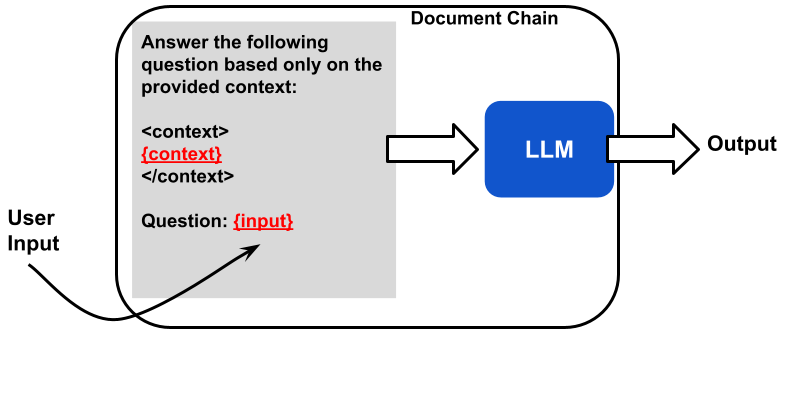

####Explanation:


- We're using the `create_stuff_documents_chain()` method, which builds a chain that:
  - Accepts a list of documents
  - "Stuffs" them into a prompt under the `<context>` section
  - Passes the complete prompt to the LLM

- The prompt is carefully structured:
  - It tells the LLM to **only answer using the provided context**
  - `{context}` gets replaced with the retrieved documents
  - `{input}` is the user’s question

- We also attach the `output_parser` to extract a clean text response from the LLM.

This chain is now ready to be combined with a retriever to form a full RAG pipeline.


### Creating the Full Retrieval Chain (RAG)


### 🖼 RAG in Action:


Here's what’s happening in the image:
- The **Retriever** finds relevant content for the user’s query
- This content is inserted into a prompt as `<context>`
- The **LLM** is instructed to answer the `{input}` question based **only** on that context

> In short: the LLM isn't guessing — it's being fed the right context just-in-time.

---

✅ With that mental model in place, let's start coding our way from a simple LLM call to a full working RAG chain.


Below is a simplified visual of what a RAG pipeline looks like:

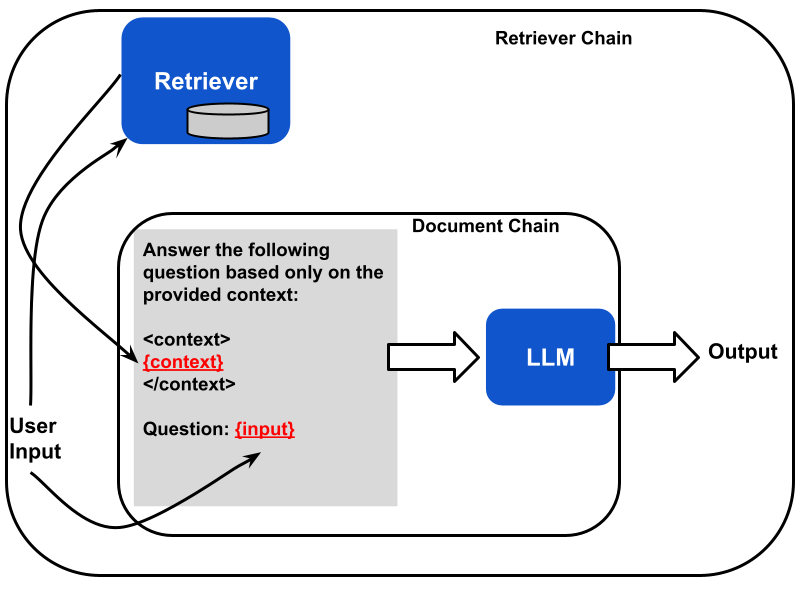

In [ ]:
# Import a helper function to create a retrieval-augmented generation (RAG) chain
from langchain.chains import create_retrieval_chain

# Convert the vector store into a retriever for performing similarity search
retriever = vector.as_retriever()

# Create a retrieval chain that uses the retriever and a document-answering chain
retrieval_chain = create_retrieval_chain(retriever, document_chain)

### Explanation:



- `vector.as_retriever()` converts the FAISS vector store into a **retriever**, which can search and return relevant document chunks based on a user query.

- `create_retrieval_chain()` then connects:
  - the **retriever** (to fetch relevant context),
  - and the **document chain** (to pass that context + question to the LLM).

Together, this forms a complete **Retrieval-Augmented Generation (RAG)** pipeline.

Now when you invoke this chain with a question, it will:
> 1. Retrieve relevant chunks,
> 2. Stuff them into a prompt,
> 3. And get a focused answer from the LLM based only on those documents.


In [ ]:
# Invoke the retrieval chain with a user query; it retrieves relevant documents and generates an answer
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})

This runs the full RAG chain with the question "how can langsmith help with testing?"
It retrieves relevant chunks from the LangSmith docs, passes them to the LLM, and prints the final answer.

In [ ]:
# Print the final answer generated by the retrieval chain
print(response["answer"].content)

**LangSmith helps with testing in the following ways:**

- **Prompt testing**: Test your prompts using built-in tools, including iteration with versioning and collaboration to ship improvements faster.
- **Tracing and evaluation**: Trace requests, evaluate outputs, and test prompts in one place.
- **Studio interface**: Use a visual interface to design, test, and refine applications end-to-end.


### Output Summary
The response is grounded in the actual documentation, highlighting LangSmith’s observability, feedback tools, and evaluation metrics — much more accurate and specific than generic answers earlier.

This shows the power of RAG: the LLM isn't guessing — it's answering based on real, retrieved content.

In [ ]:
# Invoke the retrieval chain with a follow-up question
response = retrieval_chain.invoke({"input": "how can I use it?"})

# Print the generated answer, which should use context from previously retrieved documents
print(response["answer"].content)

**To use LangSmith:**

1. **Create an account**: Sign up at [smith.langchain.com](https://smith.langchain.com) (no credit card required). Log in with Google, GitHub, or email.

2. **Create an API key**: Go to Settings → API Keys → Create API Key. Copy and save it securely.

3. **Get started**: Once your account and API key are ready, choose a quickstart to begin building.

**Setup options include**:
- **Prompt Testing**: Iterate on prompts with versioning and collaboration.
- **Studio**: Use a visual interface to design, test, and refine applications end-to-end.


Even though the question was vague ("How can I use it?"), the RAG setup still returned an accurate answer.
It understood what “it” referred to (LangSmith) by grounding the response in the retrieved documentation.

This demonstrates a key strength of RAG: the model doesn't have to guess — it uses retrieved context to resolve ambiguity and deliver relevant, specific answers.

---

### 🧪 Try It Yourself: Hands-On Exercises
You've just built a working RAG pipeline using LangChain — from basic LLM calls all the way to retrieval-augmented answers over real documentation.

Try extending what you've learned with the following hands-on tasks:

---

### 1. 🔄 Modify the Prompt Style
Tweak the system prompt to change the LLM’s behavior. For example:
- Make it more concise
- Use a professional or casual tone
- Format answers as bullet points or numbered steps

💡 *Tip: Try instructing it to act like a teacher or a product manager.*

---

### 2. 🌐 Use a Different Source
Instead of the LangSmith docs, try building a RAG pipeline over:
- OpenAI documentation
- Hugging Face blog
- Any product’s FAQ page

🛠 Change the URL inside `WebBaseLoader`.

---

### 3. 🤔 Compare: RAG vs Raw LLM
Run the same question:
- Once using `llm.invoke(...)`  
- Then using the full `retrieval_chain.invoke(...)`

Notice how the RAG version gives more grounded and specific answers.

---

### 4. ✍️ Add Few-shot Examples
Try adding one or two sample Q&A pairs directly into the prompt template — this helps guide the model toward your desired answer style.

---

### 5. 🕵️ Inspect What’s Being Retrieved
Before the LLM responds, print out the retrieved chunks to see what content it's using.

```python
docs = retriever.get_relevant_documents("your question")
for d in docs:
    print(d.page_content[:300])



---
### 6. 💬 Build a Mini Q&A Bot (Bonus)
Turn your retrieval_chain.invoke() into a simple chatbot loop:

In [ ]:
while True:
    query = input("Ask something: ")
    if query.lower() in ["exit", "quit"]:
        break
    print(retrieval_chain.invoke({"input": query})["answer"])

🧠 These exercises will help solidify your grasp on prompting, retrieval, and how to build useful tools on top of LLMs. Give them a shot!